In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

OLS stands for Ordinary least squares it is used for estimating the unknown parameters in a linear regression model. This would allow us to find out what data means with little to no infomation. this would also mean that we are able to make prediction in thing like stock or company growth, we would be able to see how well schools are improving and we would be able to see if they need to work on certain things. 

In [32]:
# Set up some colours and enhancements for our text
# We can use the 'color' class, set its method to change our text
# For example print(color.UNDERLINE + "Data Sciecne is cool")
# will underline the text
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [33]:
file = 'Advertising.csv'
df1 = pd.read_csv(file)

In [34]:
df1.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [35]:
df1.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [36]:
df1.shape

(200, 5)

<IPython.core.display.Javascript object>


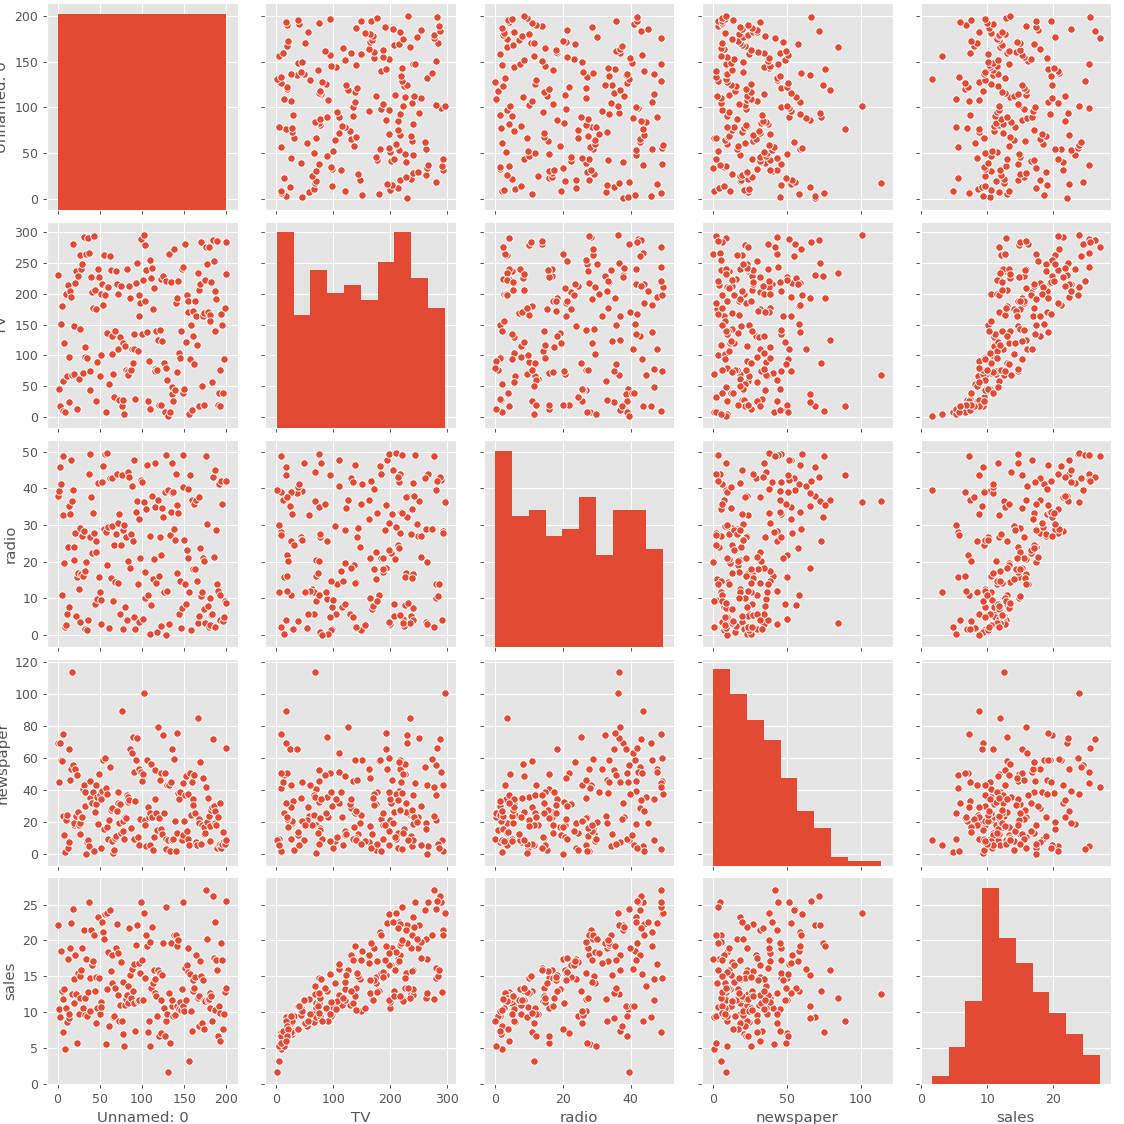

In [37]:
sns.pairplot(df1)

In [22]:
X = df1['TV'].values.reshape(-1,1) # select porosity and reshape the data
y = df1['radio'].values

# set up our model
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

# Predict the data values using our existing data
response = model.predict(X)

In [8]:
# Check our model score
r2 = model.score(X, y)
print("The model score is: ",round(r2,4))

The model score is:  0.003


In [9]:
# Let us try Porosity and Brittleness
X = df1[['TV', 'radio']].values.reshape(-1,2)
Y = df1['sales']

In [10]:
X[0:5] # just show the first 5 rows of the features' array

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8]])

In [11]:
Y[0:5]  # just show the first 5 rows of the target array

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [12]:
x = X[:, 0] 
y = X[:, 1] 
z = Y 

In [13]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)

In [14]:
r2 = model.score(X, Y)
print("The model score is: ",round(r2,4))

The model score is:  0.8972


In [15]:
x_pred = np.linspace(0.7, 300, 30)  
y_pred = np.linspace(0, 50, 30)  

In [16]:
x_pred [3], y_pred[3] 

(31.66206896551724, 5.172413793103448)

In [17]:
# use a meshgrid to combine the two features
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred) 
# transform and prepare the data for use in the model testing
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T 

In [18]:
predicted = model.predict(model_viz)
Sales= predicted.reshape(-1,1)

In [19]:
print(color.BOLD + color.BLUE + "{0:>12} {1:>12} {2:>18}".format("TV", "radio","Sales" +color.END ))
for thedata in range(0,10):  
    print("{0:12} {1:12} {2:14}".format(round(x_pred[thedata],4), round(y_pred[thedata],4),round(Sales[thedata][0],4)))

          TV        radio          Sales
         0.7          0.0         2.9531
     11.0207       1.7241         3.4253
     21.3414       3.4483         3.8976
     31.6621       5.1724         4.3698
     41.9828       6.8966          4.842
     52.3034       8.6207         5.3142
     62.6241      10.3448         5.7865
     72.9448       12.069         6.2587
     83.2655      13.7931         6.7309
     93.5862      15.5172         7.2031


<IPython.core.display.Javascript object>


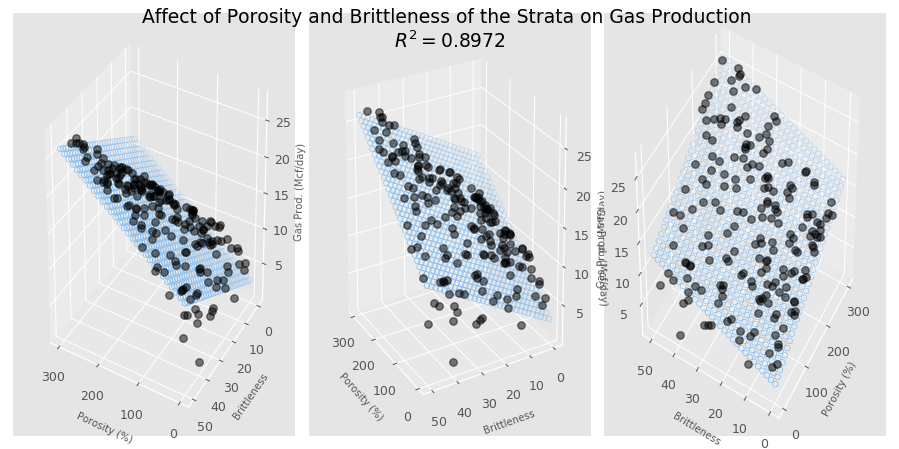

In [20]:
%matplotlib notebook 
plt.style.use('default')
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 5))

# Set up the plots and subplots for the data
# Three different projections are used
# Play around with the elevation and azimuth values to see the
# Effect on the charts
# 
ax1 = fig.add_subplot(131, projection='3d') #131 indicates number of rows, number of columns and index of the chart
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

# Chart the data using the predicted values

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=8)
    ax.set_ylabel('Brittleness', fontsize=8)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=8)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
# Change the perspective of the charts generated

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=20, azim=150)
ax3.view_init(elev=40, azim=-150)

# Add the title to the chart

fig.suptitle('Affect of Porosity and Brittleness of the Strata on Gas Production \n$R^2 = %.4f$' % r2, fontsize=15)

fig.tight_layout()

The best model to be used should be TV, rRadio and Sales. the reason is becasue as we have seen in the birvatiate we can see that the data for TV are the best, but after that radio is next as we see with the pair plot.

What we see is that using the 3D hyperplane we can see that all of the data that we have used can be viewed depending on the type of angle we use to view the data with. 